# Predecir precios de mercado de autos usados

## Introducción (5 mts)

Veremos una predicción con regresión y la alternativa de red neuronal

## Leer los datos (5 mts)

In [1]:
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('used_cars_clean.csv')

In [3]:
print(df.columns)
df.head()

Index(['city', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'desc', 'price'],
      dtype='object')


,city,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,price
0,"abilene, TX",2009.0,chevrolet,good,8 cylinders,gas,217743.0,clean,automatic,rwd,full-size,SUV,white,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,9000
1,"abilene, TX",2002.0,gmc,good,8 cylinders,gas,195000.0,clean,automatic,4wd,NaN,pickup,white,2002 GMC Sierra Extended Cab Truck For Sale! R...,6000
2,"abilene, TX",2007.0,pontiac,excellent,4 cylinders,gas,NaN,clean,automatic,fwd,compact,convertible,red,"34,965 original miles excellent condition.\n\n...",7000
3,"abilene, TX",2012.0,chevrolet,excellent,8 cylinders,diesel,178000.0,clean,automatic,4wd,full-size,pickup,silver,"2012 Chevrolet 3500 178k miles, runs and drive...",37000
4,"abilene, TX",2003.0,NaN,fair,8 cylinders,gas,269000.0,clean,automatic,4wd,NaN,pickup,silver,Silver 2003 F150 Triton v8-plugs have been cha...,3700


In [4]:
df.shape

(435653, 15)

In [5]:
df.transmission.value_counts()

automatic    386150
manual        33474
other         11731
Name: transmission, dtype: int64

## Regresión lineal e ingeniería de características (35 mts)

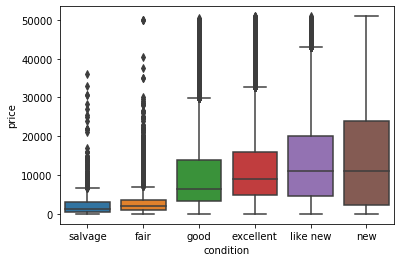

In [6]:
ax = sns.boxplot(x='condition', y='price', data=df, order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])

In [7]:
# condición
df = pd.concat([df, pd.get_dummies(df['condition'])], axis=1)
np.random.seed(0)
# Partición entre entrenamiento y prueba
mask = np.random.randn(len(df)) < 0.75
df_train = df[mask]
df_test = df[~mask]

In [8]:
model1 = 'price~salvage + fair + good + excellent + Q("like new") + new'
lml = sm.ols(formula=model1, data=df_train).fit()
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3958.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:32:46   Log-Likelihood:            -3.5809e+06
No. Observations:              336778   AIC:                         7.162e+06
Df Residuals:                  336771   BIC:                         7.162e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.481e+04     28.417    521.148

In [9]:
pred = lml.predict(df_test[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
mse(pred, df_test['price'])

101412127.78212237

### Ejercicio 1: (15 mts)
Análisis exploratorio para encontrar otras variables correlacionadas con el precio. Utilizarlas para un segundo modelo

**Respuesta.**

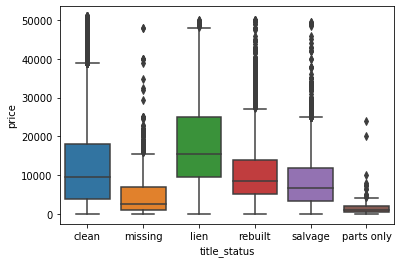

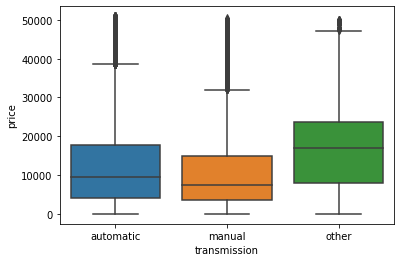

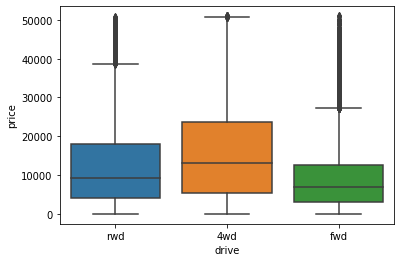

In [10]:
### Posible respuesta

for col in ['title_status', 'transmission', 'drive']:
    sns.boxplot(x=col, y='price', data=df)
    plt.show()
    df = pd.concat([df, pd.get_dummies(df[col])], axis=1)

In [12]:
for col in ['title_status', 'transmission', 'drive']:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[col])], axis=1)
    df_test = pd.concat([df_test, pd.get_dummies(df_test[col])], axis=1)

In [13]:
model2 = 'price~Q("parts only") + missing + salvage + rebuilt + clean + lien'
lml = sm.ols(formula=model2, data=df_train).fit()
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     337.3
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:38:05   Log-Likelihood:            -3.5912e+06
No. Observations:              336778   AIC:                         7.182e+06
Df Residuals:                  336770   BIC:                         7.183e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.634e+04    211

In [14]:
pred = lml.predict(df_test[['parts only', 'missing', 'salvage', 'rebuilt', 'clean', 'lien']])
mse(pred, df_test['price'])

108044577.24286048

El modelo es peor. Esto puede suceder por codificar erróneamente las variables o porque hay presencia de relaciones no lineales.

### Ejercicio 2: (5 mts)

Crear variables dummy para cada variable categórica.

**Respuesta.**

In [15]:
cols = ['manufacturer', 'fuel', 'size', 'type','paint_color']
for col in cols:
    df = pd.concat([df, pd.get_dummies(df[col])], axis=1)

df.drop('other', axis=1, inplace=True)

df.head()

,city,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,"abilene, TX",2009.0,chevrolet,good,8 cylinders,gas,217743.0,clean,automatic,rwd,...,0,0,0,0,0,0,0,0,1,0
1,"abilene, TX",2002.0,gmc,good,8 cylinders,gas,195000.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,0,1,0
2,"abilene, TX",2007.0,pontiac,excellent,4 cylinders,gas,NaN,clean,automatic,fwd,...,0,0,0,0,0,0,1,0,0,0
3,"abilene, TX",2012.0,chevrolet,excellent,8 cylinders,diesel,178000.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,1,0,0
4,"abilene, TX",2003.0,NaN,fair,8 cylinders,gas,269000.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,1,0,0


Graficos para entender mejor

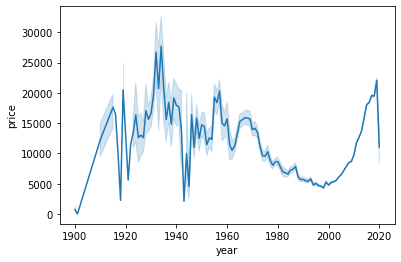

In [16]:
sns.lineplot(x='year', y='price', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

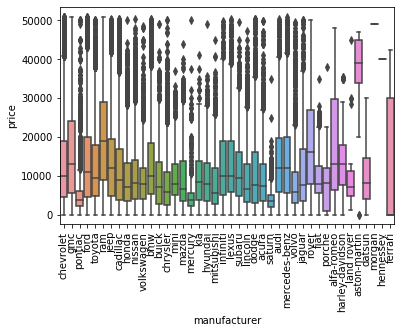

In [17]:
sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation=90)

Sorprende que el precio no se incremente linealmente con la condición del auto, y el ruido de los precios antes de 1980

## Red neuronal (50 mts)

<img src="neural_net.png" width="300" height="300" />

El algoritmo toma entradas del lado izquierdo para generar salidas al lado derecho multiplicando cada capa por las aristas de las neuronas de la siguiente capa. Luego, el algoritmo utiliza cálculo multivariado en un proceso llamado descenso de gradiente.


Se pueden agregar más capas intermedias:

<img src='deep_net.png' width='300' height='300' />

Esto es una red neuronal profunda.

<img src="neural_net2.png" width="300" height="300" />

(*Fuente:* https://medium.com/wwblog/transformation-in-neural-networks-cdf74cbd8da8).

Cada nodo es una combinación lineal de la capa anterior. Entre cada capa, hay una **función de activación** (usualmente la función sigmoide / regressión logística), lo que le permite a la red establecer relaciones no-lineales. Cuando hay múltiples capas, se pueden seguir agregando combinaciones lineales, que pueden llegar a modelos no-lineales más complejos. Esta es la mayor fortaleza de las redes neuronales sobre las regresiones. Otra función de activación no-lineal que se puede utilizar es la función *relu*, que luce de la siguiente manera:

<img src="relu.png" width="300" height="300" />

In [18]:
df_clean = pd.concat([df['year'], df.iloc[:,14:]], axis=1)#.dropna(inplace=True, axis=0)
df_clean.dropna(inplace=True)
df_clean.head()

,year,price,excellent,fair,good,like new,new,salvage,clean,lien,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,2009.0,9000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2002.0,6000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2007.0,7000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2012.0,37000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2003.0,3700,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Particionemos entre entrenamiento y prueba:

In [19]:
np.random.seed(0)
mask = np.random.randn(len(df_clean)) < 0.75
df_train = df_clean[mask]
df_test = df_clean[~mask]

print('Training:', len(df_train))
print('Testing:', len(df_test))
print('Total:', len(df))

Training: 335934
Testing: 98608
Total: 435653


In [20]:
# Re indexar
df_train.index = np.arange(len(df_train))
df_test.index = np.arange(len(df_test))

### Ejercicio 4: (5 mts)

¿Cuál de los siguientes es un caso de uso apropiado para una red neuronal?

A. Clasificar imágenes de dígitos escritos a mano

B. Analizar el Quijote

C. Subtitular una fotografía

D. Ordenar un arreglo de numpy

**Respuesta.** 
B corresponde a un problema de procesamiento de lenguaje natural, C es una tarea que realiza mejor un humano y D es ineficiente hacer con una red, mejor utilizar un algoritmo de ordenamiento. La respuesta es la A, una tarea de clasificación con aprendizaje de por medio.

### Un primer modelo (5 mts)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

Consideremos el siguiente modelo de ejemplo:

In [22]:
toy = df_train.iloc[:1000].loc[:,['year', 'price']]
toy['price'] = (toy['price'] - toy['price'].mean()) / toy['price'].std() # Normalizar
toy['year'] = (toy['year'] - toy['year'].mean()) / toy['year'].std()

toy['toy'] = (toy['price'] ** 2 - toy['year'] ** 3)
toy.head()

,year,price,toy
0,-0.650935,-0.700488,0.766495
1,0.430189,0.599313,0.279564
2,0.921609,2.462827,5.282735
3,0.626757,1.903773,3.378144
4,-0.454367,-0.905940,0.914532


Ajustemos una regresión y una red neuronal:

In [23]:
failure_model = 'toy~year + price'
lml = sm.ols(formula=failure_model, data=toy).fit()
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                    toy   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     911.4
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          8.34e-226
Time:                        19:08:53   Log-Likelihood:                -4190.0
No. Observations:                1000   AIC:                             8386.
Df Residuals:                     997   BIC:                             8401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4639      0.506      8.823      0.0

In [25]:
pred = lml.predict(toy[['year', 'price']])
mse(pred, toy['toy'])

255.19427167174106

In [26]:
toy_model = keras.Sequential([layers.Dense(1000,activation='relu', input_shape=[2,]),
                              layers.Dense(500, activation='relu'),
                              layers.Dense(1)])

opt = keras.optimizers.Adam(decay=0.01/500)
toy_model.compile(loss='mse', optimizer=opt, metrics=['mse'])
toy_model.fit(toy[['price','year']], toy['toy'], epochs=200, validation_split = 0.2, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 1s 1ms/sample - loss: 729.9936 - mse: 729.9935 - val_loss: 139.5562 - val_mse: 139.5562
Epoch 2/200
800/800 [==============================] - 0s 327us/sample - loss: 473.9273 - mse: 473.9273 - val_loss: 55.6002 - val_mse: 55.6002
Epoch 3/200
800/800 [==============================] - 0s 279us/sample - loss: 220.7224 - mse: 220.7224 - val_loss: 49.6338 - val_mse: 49.6338
Epoch 4/200
800/800 [==============================] - 0s 276us/sample - loss: 159.8295 - mse: 159.8295 - val_loss: 38.3867 - val_mse: 38.3867
Epoch 5/200
800/800 [==============================] - 0s 231us/sample - loss: 149.9505 - mse: 149.9505 - val_loss: 39.2079 - val_mse: 39.2079
Epoch 6/200
800/800 [==============================] - 0s 302us/sample - loss: 117.3918 - mse: 117.3919 - val_loss: 33.8730 - val_mse: 33.8730
Epoch 7/200
800/800 [==============================] - 0s 299us/sample - loss: 89.1379 - mse: 89

800/800 [==============================] - 0s 315us/sample - loss: 1.4889 - mse: 1.4889 - val_loss: 0.1129 - val_mse: 0.1129
Epoch 60/200
800/800 [==============================] - 0s 326us/sample - loss: 5.5096 - mse: 5.5096 - val_loss: 0.6572 - val_mse: 0.6572
Epoch 61/200
800/800 [==============================] - 0s 380us/sample - loss: 5.9782 - mse: 5.9782 - val_loss: 0.5481 - val_mse: 0.5481
Epoch 62/200
800/800 [==============================] - 0s 335us/sample - loss: 3.6204 - mse: 3.6204 - val_loss: 8.1469 - val_mse: 8.1469
Epoch 63/200
800/800 [==============================] - 0s 305us/sample - loss: 12.7249 - mse: 12.7249 - val_loss: 0.3477 - val_mse: 0.3477
Epoch 64/200
800/800 [==============================] - 0s 303us/sample - loss: 10.1828 - mse: 10.1828 - val_loss: 1.8261 - val_mse: 1.8261
Epoch 65/200
800/800 [==============================] - 0s 314us/sample - loss: 5.4635 - mse: 5.4635 - val_loss: 3.5098 - val_mse: 3.5098
Epoch 66/200
800/800 [=====================

800/800 [==============================] - 0s 285us/sample - loss: 1.0183 - mse: 1.0183 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 119/200
800/800 [==============================] - 0s 248us/sample - loss: 4.2063 - mse: 4.2063 - val_loss: 4.6617 - val_mse: 4.6617
Epoch 120/200
800/800 [==============================] - 0s 241us/sample - loss: 7.7581 - mse: 7.7581 - val_loss: 1.5196 - val_mse: 1.5196
Epoch 121/200
800/800 [==============================] - 0s 176us/sample - loss: 2.4401 - mse: 2.4401 - val_loss: 1.0345 - val_mse: 1.0345
Epoch 122/200
800/800 [==============================] - 0s 178us/sample - loss: 0.5900 - mse: 0.5900 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 123/200
800/800 [==============================] - 0s 215us/sample - loss: 3.8108 - mse: 3.8108 - val_loss: 0.2579 - val_mse: 0.2579
Epoch 124/200
800/800 [==============================] - 0s 265us/sample - loss: 3.8264 - mse: 3.8264 - val_loss: 1.9918 - val_mse: 1.9918
Epoch 125/200
800/800 [==================

Epoch 177/200
800/800 [==============================] - 0s 310us/sample - loss: 1.0000 - mse: 1.0000 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 178/200
800/800 [==============================] - 0s 302us/sample - loss: 2.2641 - mse: 2.2641 - val_loss: 0.1032 - val_mse: 0.1032
Epoch 179/200
800/800 [==============================] - 0s 215us/sample - loss: 15.3286 - mse: 15.3286 - val_loss: 0.4820 - val_mse: 0.4820
Epoch 180/200
800/800 [==============================] - 0s 236us/sample - loss: 6.0819 - mse: 6.0819 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 181/200
800/800 [==============================] - 0s 285us/sample - loss: 0.8298 - mse: 0.8298 - val_loss: 0.1653 - val_mse: 0.1653
Epoch 182/200
800/800 [==============================] - 0s 262us/sample - loss: 0.8217 - mse: 0.8217 - val_loss: 0.5229 - val_mse: 0.5229
Epoch 183/200
800/800 [==============================] - 0s 242us/sample - loss: 0.5650 - mse: 0.5650 - val_loss: 1.3034 - val_mse: 1.3034
Epoch 184/200
800/800 [==

### No linealridad (15 mts)

La razón por la cual el modelo lineal falla mientras la red no se debe a la no linearidad. Se definió la columna `toy` como un polinomio cúbico de `year` y `price`. Por definición un modelo lineal no entenderá esta relación. Una red neuronal puede lidiar con estos modelos más complejos.

En el ejemplo de arriba, es fácil saber por qué la relación es fundamentalmente no lineal, pero en el mundo real estas conexiones son menos claras. 

Usaremos el constructor *Sequential* de Keras. Esta es una guía de cómo usar Keras: https://keras.io/getting-started/sequential-model-guide/. El siguiente modelo construye una red de una capa. Necesitamos especificar la función de activación y la entrada: 


In [28]:
neurons = 128

model = keras.Sequential([layers.Dense(neurons, activation='relu', input_shape=[len(df_train.columns) - 1,]), # Capa de entrada
                          layers.Dense(1)]) # Capa de salida

Adicional a las capas, necesitamos 3 parámetros:

1. Función de pérdida *loss function* - define qué tan errónea es la respuesta final.
2. El optimizador - el algoritmo que minimiza la función de pérdida ajustando los pesos de la regresión lineal.
3. Una lista de métricas que determinan el rendimiento del modelo: https://keras.io/metrics/

Se ingresa de la siguiente manera:

In [29]:
model.compile(loss='mse', # Error cuadrático medio (https://en.wikipedia.org/wiki/Mean_squared_error)
              optimizer = 'adam', # algoritmo desarrollado en 2018, (https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)
              metrics = ['mse'] # Una buena métrica
             )

En una red neuronal, entrenar el modelo consiste en ajustar cada pesos entre cada nodo minimizando la diferencia entre valores predecidos y observaciones actuales. Luego de esto, se corre para el conjunto de prueba para ver qué tan bien generaliza:

In [30]:
X = df_train.drop('price', axis=1)
X['year'] = (X['year'] - df_train['year'].mean()) / df_train['year'].std()

y = df_train['price']
y = (y - df_train['price'].mean()) / df_train['price'].std()

X_test = df_test.drop('price', axis=1)
X_test['year'] = (X_test['year'] - df_test['year'].mean()) / df_test['year'].std()
y_test = df_test['price']
y_test = (y_test - df_test['price'].mean()) / df_test['price'].std()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Todo listo para entrenar el moddelo. Usaremos las función `fit` de Keras, la cual usa los siguientes parámetros:

1. Datos de entrada
2. Etiquetas de entrada
3. Número de épocas
4. Verbosidad: 0, 1, o 2, dependiendo qué tanta información se quiere ver durante el entrenamiento
5. Corte de validación: una fracción de los datos de entrenamiento que se *evita* usar durante el entrenamiento, para prevenir el sobreajuste
6. Tamaño del lote: Cuántas observaciones entrenar a la vez. Un lote más grande entrena más rápido, hasta que el algoritmo encuentre rendimientos decrecientes. Un lote grande también convella menor precisión.

A continuación un ejemplo:

In [31]:
history = model.fit(X, y, epochs=10, validation_split = 0.2, verbose=1, batch_size=1000)

Train on 268747 samples, validate on 67187 samples
Epoch 1/10
268747/268747 [==============================] - 2s 7us/sample - loss: 0.5889 - mse: 0.5889 - val_loss: 0.5125 - val_mse: 0.5125
Epoch 2/10
268747/268747 [==============================] - 1s 4us/sample - loss: 0.5013 - mse: 0.5013 - val_loss: 0.4919 - val_mse: 0.4919
Epoch 3/10
268747/268747 [==============================] - 1s 4us/sample - loss: 0.4878 - mse: 0.4878 - val_loss: 0.4875 - val_mse: 0.4875
Epoch 4/10
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4791 - mse: 0.4791 - val_loss: 0.4772 - val_mse: 0.4772
Epoch 5/10
268747/268747 [==============================] - 1s 4us/sample - loss: 0.4724 - mse: 0.4724 - val_loss: 0.4731 - val_mse: 0.4731
Epoch 6/10
268747/268747 [==============================] - 1s 4us/sample - loss: 0.4671 - mse: 0.4671 - val_loss: 0.4716 - val_mse: 0.4716
Epoch 7/10
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4629 - mse: 0.4629 - val_

In [32]:
model.evaluate(X_test, y_test)

98608/98608 [==============================] - 2s 23us/sample - loss: 0.4664 - mse: 0.4664


[0.4664380843233563, 0.4664382]

Ahora intentemos un modelo más profundo con el método `add()`

### Ejericio 5: (10 mts)

Utilice Keras para crear un modelo profundo con 3 capas sobre los datos de entranamiento, luego ajústelo sobre los datos de prueba. Compare este modelo a una regresión lineal que utilice las mismas variables de los datos normalizados.

**Respuesta.**

In [33]:
deep_model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=[len(X.columns),]),])
deep_model.add(layers.Dense(64, activation='softmax'))
deep_model.add(layers.Dense(1))

deep_model.compile(loss='mse', optimizer = 'adam', metrics = ['mse'])

In [34]:
history = deep_model.fit(X, y, epochs=100, validation_split=0.2, verbose=1, batch_size=2000)

Train on 268747 samples, validate on 67187 samples
Epoch 1/100
268747/268747 [==============================] - 2s 7us/sample - loss: 0.8127 - mse: 0.8127 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 2/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.6406 - mse: 0.6406 - val_loss: 0.6052 - val_mse: 0.6052
Epoch 3/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.6037 - mse: 0.6037 - val_loss: 0.5778 - val_mse: 0.5778
Epoch 4/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.5727 - mse: 0.5727 - val_loss: 0.5460 - val_mse: 0.5460
Epoch 5/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.5424 - mse: 0.5424 - val_loss: 0.5263 - val_mse: 0.5263
Epoch 6/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.5243 - mse: 0.5243 - val_loss: 0.5131 - val_mse: 0.5131
Epoch 7/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.5120 - mse: 0.5120

268747/268747 [==============================] - 1s 5us/sample - loss: 0.4345 - mse: 0.4345 - val_loss: 0.4476 - val_mse: 0.4476
Epoch 59/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4335 - mse: 0.4335 - val_loss: 0.4509 - val_mse: 0.4509
Epoch 60/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4330 - mse: 0.4330 - val_loss: 0.4475 - val_mse: 0.4475
Epoch 61/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4329 - mse: 0.4329 - val_loss: 0.4509 - val_mse: 0.4509
Epoch 62/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4318 - mse: 0.4318 - val_loss: 0.4606 - val_mse: 0.4606
Epoch 63/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4312 - mse: 0.4312 - val_loss: 0.4478 - val_mse: 0.4478
Epoch 64/100
268747/268747 [==============================] - 1s 5us/sample - loss: 0.4312 - mse: 0.4312 - val_loss: 0.4492 - val_mse: 0.4492
Epoch 65/100
268747

Note cómo en este caso, el MSE es más alto, pero cae de forma más consistente. En redes pequeñas, ligeros cambios en el gradiente de optimización puede causar que el MSE fluctúe bastante, mientras que en redes grandes el ajuste es mejor aunque más lento. Si aumentamos el número de épocas la red terminará entrenando perfectamente. La cuestión entonces es escoger entre precisión y eficiencia.

In [35]:
deep_model.evaluate(X_test, y_test, batch_size=2000)

98608/98608 [==============================] - 0s 2us/sample - loss: 0.4504 - mse: 0.4504


[0.45041580382887464, 0.45041585]

In [36]:
comparison_model = 'price~year'
problematic_columns = set(['4wd', 'alfa-romeo', 'aston-martin', 'harley-davidson',
                           'mercedes-benz', 'full-size', 'mid-size', 'sub-compact', 'mini-van'])
for col in X.columns[1:]:
    if len(col.split()) == 1 and col not in problematic_columns:
        comparison_model = comparison_model + ' + ' + col
    else:
        comparison_model = comparison_model + ' + Q("' + col + '")'

lml = sm.ols(formula=comparison_model, data=pd.concat([X, y], axis=1)).fit()
lml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     1503.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:34:39   Log-Likelihood:            -4.1875e+05
No. Observations:              335934   AIC:                         8.377e+05
Df Residuals:                  335841   BIC:                         8.387e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3920      0.022     17.730      0.000       0.349       0.435
year                     0.2830      0.002    163.834      0.000       0.280       0.286
excellent               -0.1283      0.004    -32.257      0.000      -0.136      -0.121
fair                    -0.6583      0.009    -69.631      0.000      -0.677      -0.640
good                    -0.2713      0.004    -63.857      0.000      -0.280      -0.263
Q("like new")            0.0255      0.007      3.871      0.000       0.013       0.038
new                      0.1195      0.032      3.790      0.000       0.058       0.181
salvage[0]              -0.6292      0.034    -18.704      0.000      -0.695      -0.563
salvage[1]              -0.2062      0.023     -8.861      0.000      -0.252      -0.161
clean                   -0.0822      0.018     -4.570      0.000      -0.117      -0.047
lien                     0.3621      0.024     14.880      0.000       0.314       0.410
missing                  0.3247      0.042      7.720      0.000       0.242       0.407
Q("parts only")         -0.2260      0.089     -2.527      0.011      -0.401      -0.051
rebuilt                 -0.1078      0.021     -5.160      0.000      -0.149      -0.067
automatic               -0.2115      0.008    -26.566      0.000      -0.227      -0.196
manual                  -0.0904      0.010     -9.362      0.000      -0.109      -0.072
Q("4wd")                 0.2317      0.005     45.990      0.000       0.222       0.242
fwd                     -0.1667      0.005    -32.362      0.000      -0.177      -0.157
rwd                      0.1567      0.006     27.552      0.000       0.146       0.168
acura                   -0.1757      0.018     -9.993      0.000      -0.210      -0.141
Q("alfa-romeo")          0.6314      0.104      6.073      0.000       0.428       0.835
Q("aston-martin")        1.7221      0.243      7.081      0.000       1.245       2.199
audi                    -0.0883      0.016     -5.654      0.000      -0.119      -0.058
bmw                     -0.1370      0.012    -11.479      0.000      -0.160      -0.114
buick                   -0.1340      0.015     -8.937      0.000      -0.163      -0.105
cadillac                -0.0236      0.014     -1.653      0.098      -0.052       0.004
chevrolet               -0.1108      0.009    -12.747      0.000      -0.128      -0.094
chrysler                -0.3301      0.014    -24.293      0.000      -0.357      -0.303
datsun                   0.5399      0.104      5.189      0.000       0.336       0.744
dodge                   -0.2928      0.011    -26.896      0.000      -0.314      -0.272
ferrari                 -0.6037      0.421     -1.434      0.152      -1.429       0.221
fiat                    -0.3656      0.038     -9.587    

In [37]:
pred = lml.predict(X_test)
mse(pred, y_test)

0.713143388089478

La red de 3 capas realiza un ajuste mejor que la regresión.

## El lado oscuro de las redes neuronales (15 mts)

Pareciera que una red neuronal es capaz de resolver cualquier problema, puesto que parece ser infinitamente flexible sin mucho esfuerzo en la configuración de los parámetros.

Esto no es cierto:

### Exercise 6: (10 mts)

Ajusta una red de 10 capas.

**Respuesta.**

In [38]:
stupid_model = keras.Sequential([layers.Dense(10000, activation='relu', input_shape=[len(X.columns),])])
stupid_model = keras.Sequential([layers.Dense(5000, activation='relu', input_shape=[len(X.columns),])])
stupid_model = keras.Sequential([layers.Dense(2000, activation='relu', input_shape=[len(X.columns),])])
for _ in np.arange(8):
    stupid_model.add(layers.Dense(100, activation='relu'))
stupid_model.add(layers.Dense(1))

stupid_model.compile(loss='mse', optimizer='adam')

In [39]:
stupid_model.fit(X.iloc[:20000], y.iloc[:20000], epochs=100, validation_split=0.2, verbose=1, batch_size=1000)

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 2s 118us/sample - loss: 0.7174 - val_loss: 0.6556
Epoch 2/100
16000/16000 [==============================] - 1s 44us/sample - loss: 0.4784 - val_loss: 0.5839
Epoch 3/100
16000/16000 [==============================] - 1s 48us/sample - loss: 0.4099 - val_loss: 0.5630
Epoch 4/100
16000/16000 [==============================] - 1s 50us/sample - loss: 0.3876 - val_loss: 0.5853
Epoch 5/100
16000/16000 [==============================] - 1s 50us/sample - loss: 0.3644 - val_loss: 0.5655
Epoch 6/100
16000/16000 [==============================] - 1s 54us/sample - loss: 0.3441 - val_loss: 0.5706
Epoch 7/100
16000/16000 [==============================] - 1s 54us/sample - loss: 0.3333 - val_loss: 0.5652
Epoch 8/100
16000/16000 [==============================] - 1s 49us/sample - loss: 0.3248 - val_loss: 0.5736
Epoch 9/100
16000/16000 [==============================] - 1s 46us/sample - loss: 0.30

Epoch 76/100
16000/16000 [==============================] - 1s 45us/sample - loss: 0.0870 - val_loss: 0.7374
Epoch 77/100
16000/16000 [==============================] - 1s 51us/sample - loss: 0.0836 - val_loss: 0.7208
Epoch 78/100
16000/16000 [==============================] - 1s 48us/sample - loss: 0.0831 - val_loss: 0.7455
Epoch 79/100
16000/16000 [==============================] - 1s 52us/sample - loss: 0.0803 - val_loss: 0.7259
Epoch 80/100
16000/16000 [==============================] - 1s 59us/sample - loss: 0.0784 - val_loss: 0.7579
Epoch 81/100
16000/16000 [==============================] - 1s 50us/sample - loss: 0.0813 - val_loss: 0.7451
Epoch 82/100
16000/16000 [==============================] - 1s 54us/sample - loss: 0.0780 - val_loss: 0.7117
Epoch 83/100
16000/16000 [==============================] - 1s 49us/sample - loss: 0.0807 - val_loss: 0.7594
Epoch 84/100
16000/16000 [==============================] - 1s 56us/sample - loss: 0.0838 - val_loss: 0.7352
Epoch 85/100
16000/

Evaluemos el modelo con datos que no conoce:

In [40]:
stupid_model.evaluate(X_test, y_test)

98608/98608 [==============================] - 6s 57us/sample - loss: 0.6843


0.6843401661326161

¿Qué sucedió? El modelo sufre de sobreajuste. Pero claro, también se sobreajustan modelos de regresión lineal y logística, ¿por qué es particularmente malo que ocurra con redes neuronales?

### Exercise 7: (5 mts)

¿Cuál de los siguientes es un inconveniente de resolver este problema con una red neuronal en lugar de una regresión lineal?

I. Falta de transparencia en el algoritmo

II. Dificultad de usar

III. Velocidad de ejecución

**Respuesta.** I correcto, Falta de transparencia que hace difícil mejorar sus resultados. II es incorrecto – Lo más difícil es ajustar los parámetros, lo cual puede ser tedioso pero no difícil. III es una dificultad potencial, entre más complejo sea el problema mayor tiempo conlleva entrenar.

El reto se encuentra en la naturaleza de **caja negra** de las redes neuronales. Como la matemática no es tan intuitiva, requiere tiempo y esfuerzo determinar los mejores parámetros u optimizadores. Aun más, si el modelo se sobreajusta, es mucho más difícil interpretar, diagnosticar y mejorar en comparación a un modelo de regresión.

## Conclusiones (5 mts)

Vimos los alcances de la regresión lineal ante datos con no-linearidad. Usando una red neuronal simple, la predicción mejoró bastante. Pero también vimos que las redes se encuentran en desventaja en cuanto a interpretabilidad.

## Aprendizajes (5 mts)

Aspectos importantes:

1. Las redes neuronales pueden interpretar transformaciones sobre los datos como información relevante
2. En algunas ocasiones, una red neuronal puede ser más eficiente que la ingeniería de características
3. La mayor desventaja de las redes es su baja interpretabilidad, pero su mayor ventaja es su alta flexibilidad ante problemas complejos